In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import sys
sys.path.append("./class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
mesh_args = {"mesh_size_frac": 0.15, "mesh_size_bound": 0.15}
gb, domain = pp.grid_buckets_2d.benchmark_regular(mesh_args)

In [3]:
parameter={"aperture":1e-3,
          "fracture_perm":1e4,
          "perm":1,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

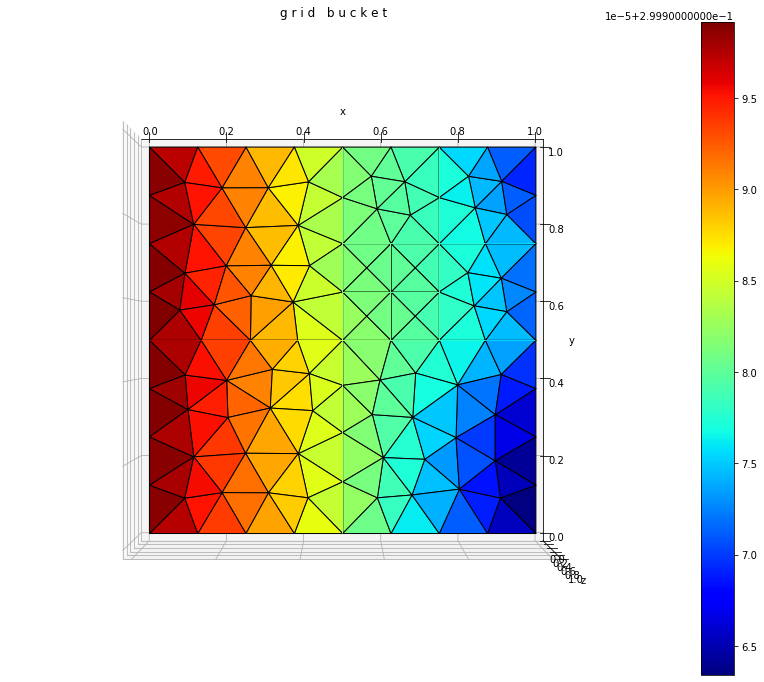

In [4]:
flow=Flow(gb,domain,parameter)
flow.add_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [5]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"t_max":1 /3,
    #"t_max":345600,
    "t_max":7000,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [6]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
#CaSiO3_value=[1.0,0.0]
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [7]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       "rate_const":0.004466,
       #"rate_const":0.0,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":1}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.229802863847148e-05


In [8]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)

mass
  (0, 0)	0.0011281395367104764
  (1, 1)	0.0011557313480247775
  (2, 2)	0.0012846679807381163
  (3, 3)	0.0016040112537403423
  (4, 4)	0.0013772800196366903
  (5, 5)	0.0013754312433782723
  (6, 6)	0.0013740438131216862
  (7, 7)	0.0014670671437641322
  (8, 8)	0.0011063258372420975
  (9, 9)	0.001107589852068596
  (10, 10)	0.0013071684992472777
  (11, 11)	0.0011301225195090429
  (12, 12)	0.0012096292514058337
  (13, 13)	0.0012826664887492256
  (14, 14)	0.0013299006238486199
  (15, 15)	0.0012993797060060386
  (16, 16)	0.0013079952069756505
  (17, 17)	0.0012597798773541558
  (18, 18)	0.0011310309708900403
  (19, 19)	0.0010817190724411137
  (20, 20)	0.0011745302249575882
  (21, 21)	0.001166418223673641
  (22, 22)	0.0011664182236736397
  (23, 23)	0.0013656692750024597
  (24, 24)	0.0012379180470989126
  :	:
  (202, 202)	9.327028610469707e-06
  (203, 203)	9.761997591572973e-06
  (204, 204)	1.0217245365785882e-05
  (205, 205)	1.0693728432171442e-05
  (206, 206)	1e-05
  (207, 207)	1e-05
  (208

[[ 2.39951312e-05  3.63825382e-05  2.40369146e-05  3.30470647e-05
   2.60919986e-05  3.77866781e-05  3.47837216e-05  3.06716926e-05
   2.29689288e-05  3.55598151e-05  3.43867071e-05  4.08086041e-05
   3.50435932e-05  3.14029845e-05  3.57528428e-05  4.10074749e-05
   3.32504752e-05  3.09025532e-05  3.22457425e-05  3.77739541e-05
   3.41282883e-05  3.35043242e-05  1.63982806e-05  3.55664599e-05
   3.26451461e-05  3.37023910e-05  3.52444849e-05  3.50974873e-05
   3.24325949e-05  3.60861130e-05  5.33600000e-05  3.37196701e-05
   3.55343631e-05  4.59955864e-05  4.59919637e-05  3.80659292e-05
   3.25732065e-05  3.24338112e-05  3.33230718e-05  3.36837663e-05
   3.10710633e-05  5.33600000e-05  3.15234194e-05  3.25732033e-05
   3.10903320e-05  2.29221059e-05  1.40430254e-05  3.11084948e-05
   3.11752372e-05  3.44638861e-05  3.37878769e-05  3.48254090e-05
   2.65204668e-05  2.31375320e-05  4.29565265e-05  3.45340146e-05
   3.08315187e-05  3.22089543e-05  2.71172307e-05  1.33350560e-05
   2.54230

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


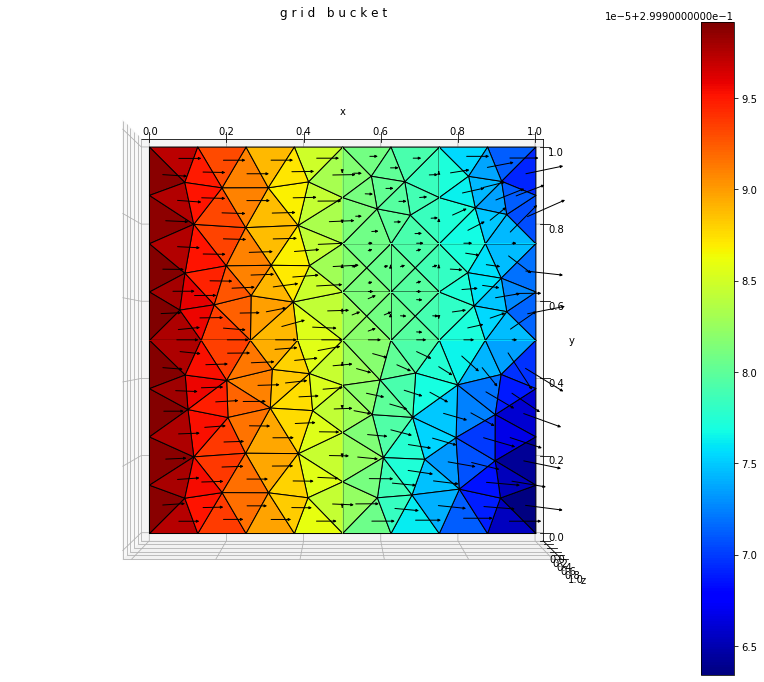

In [9]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

pp.fvutils.compute_darcy_flux(gb, keyword_store=key ,lam_name=mortar)

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    d[pp.STATE]["P0_flux"]*=2000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

In [10]:
for g,d in gb:
    #d[pp.PARAMETERS]["Ca"]["darcy_flux"]=0.0*d[pp.PARAMETERS]["Ca"]["darcy_flux"]
    print("velocity")
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

velocity
[-3.87753792e-06 -3.92057195e-06  0.00000000e+00 -2.56706748e-06
 -2.34249989e-06  6.67000000e-06  6.67000000e-06  0.00000000e+00
  7.65186092e-06  4.76469387e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.23479155e-06 -2.90386082e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.07634556e-06  1.17563368e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.97854636e-06
  2.01178303e-06 -1.20186871e-06  8.69937040e-07  6.67000000e-06
  6.67000000e-06  0.00000000e+00  5.29091151e-06  5.81526610e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.89571577e-06
 -2.72058421e-06  1.75446450e-06 -7.48405274e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.41009972e-06  2.59438555e-06
  0.00000000e+00  0.00000000e+00  2.80252736e-06 -7.29599696e-07
  1.33680892e-06  5.01583375e-07  0.00000000e+00  0.00000000e+00
  1.11079873e-06  1.13861120e-06 -8.36588630e-07 -9.44156368e-07
  0.00000000e+00  0.00000000e+00  1.30453745e-06  2.66073897e-06
  1.26615783e-06

In [11]:
transport.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport.get_flux(CaSiO3)    
transport.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport.get_transport_lhs_rhs(CaSiO3)

mass
  (0, 0)	0.0011281395367104764
  (1, 1)	0.0011557313480247775
  (2, 2)	0.0012846679807381163
  (3, 3)	0.0016040112537403423
  (4, 4)	0.0013772800196366903
  (5, 5)	0.0013754312433782723
  (6, 6)	0.0013740438131216862
  (7, 7)	0.0014670671437641322
  (8, 8)	0.0011063258372420975
  (9, 9)	0.001107589852068596
  (10, 10)	0.0013071684992472777
  (11, 11)	0.0011301225195090429
  (12, 12)	0.0012096292514058337
  (13, 13)	0.0012826664887492256
  (14, 14)	0.0013299006238486199
  (15, 15)	0.0012993797060060386
  (16, 16)	0.0013079952069756505
  (17, 17)	0.0012597798773541558
  (18, 18)	0.0011310309708900403
  (19, 19)	0.0010817190724411137
  (20, 20)	0.0011745302249575882
  (21, 21)	0.001166418223673641
  (22, 22)	0.0011664182236736397
  (23, 23)	0.0013656692750024597
  (24, 24)	0.0012379180470989126
  :	:
  (202, 202)	9.327028610469707e-06
  (203, 203)	9.761997591572973e-06
  (204, 204)	1.0217245365785882e-05
  (205, 205)	1.0693728432171442e-05
  (206, 206)	1e-05
  (207, 207)	1e-05
  (208

In [12]:
print(transport.mortar_variable)

mortar_tracer


In [13]:
save_every = 1
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb, file_name="CaSiO3", folder_name="CaSiO3")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.

CaSiO3
[16.66024676 15.73862417 14.77447244 16.48060981 11.96444444 16.66020742
 16.46526546 16.66023139 14.65115746 16.65998599 15.72319727 16.66025148
 13.99875227 16.50540523 16.42798085 16.66025148 16.47558865 16.64988029
 16.66009947 16.66025148 16.36801058 14.88145658 16.66025016 16.65246556
 15.85393647 16.62106164 16.65706136 16.61384967 16.65590117 16.65359283
 16.47712874 16.65360065 16.64631063 16.65965124 16.66011194 16.66025147
  7.42175681 16.65497833 16.65159239 16.45709525 16.50279834 16.66022843
 16.66024866 16.62583004 16.63204172 13.27149104 16.63215557 16.65580329
  8.1204286  16.44994905  6.94966644 16.66020819 15.40170775 15.48901759
 16.66025148  8.33023595 16.6035081   8.71294373 16.66024863 16.66024808
 14.38122455 15.90797502 16.66025148 16.66025148 16.66024733 13.45138733
 16.66022811 13.31945944 16.65886021 16.0954079  16.66025147 16.66011973
 16.66025142 13.83032999 16.66000217 16.65855396 16.61137368 10.85487377
 16.66005076 15.61714853 16.65999364 16.6602

Ca
[0.14144284 0.12694204 0.11915673 0.13746534 0.08774623 0.1414387
 0.13569445 0.1414412  0.11074231 0.14142073 0.12148709 0.14144345
 0.11128792 0.13678561 0.13472521 0.14144345 0.13598661 0.14094939
 0.14143008 0.14144344 0.13373461 0.1215764  0.14144338 0.1410386
 0.12396918 0.13988876 0.14130747 0.13963077 0.14120675 0.14109298
 0.13658619 0.14109326 0.1409916  0.1414107  0.14143378 0.14144344
 0.03969527 0.14116256 0.14100407 0.13547613 0.1367125  0.14144146
 0.14144305 0.14006807 0.14029746 0.10165437 0.1410911  0.14120348
 0.04572333 0.1357389  0.04302807 0.14143878 0.12596973 0.12761288
 0.14144345 0.04759339 0.13939995 0.05107418 0.14144304 0.14144298
 0.11144918 0.13057797 0.14144344 0.14144344 0.14144287 0.09199407
 0.14144085 0.09315524 0.14134965 0.12971737 0.14144344 0.14143169
 0.14144343 0.0969965  0.14142243 0.14133234 0.13968501 0.06648511
 0.14142599 0.12416921 0.14142134 0.14144345 0.14144345 0.13956633
 0.09170677 0.03382756 0.14142051 0.14143958 0.09624713 0.037

[0.02913147]
FINE
CaSiO3
[4.85690315]
Ca
[0.06407066]
FINE
CaSiO3
[5.55463437]
Ca
[0.07327496]
FINE
CaSiO3
[1.00762868]
Ca
[0.0132923]
FINE
CaSiO3
[13.5101345]
Ca
[0.17822102]
FINE
CaSiO3
[1.00756513]
Ca
[0.01329146]
FINE
CaSiO3
[11.85991961]
Ca
[0.15645202]
FINE
CaSiO3
[5.55314902]
Ca
[0.07325537]
FINE
CaSiO3
[16.51794634 13.55950173 13.03088813 15.33878388  8.33925782 16.50977187
 14.18017879 16.51463523 10.47622869 16.48494715 10.96100519 16.51957072
 12.0178344  14.56036126 13.86789211 16.51957169 14.2888855  16.14955417
 16.49821893 16.51956651 13.69487784 13.47994717 16.51952544 16.19191709
 11.51498505 15.61657454 16.43135124 15.49264599 16.31336864 16.23015658
 14.81824541 16.2302785  16.30697281 16.49106792 16.50829306 16.51955052
  2.06527415 16.28275355 16.17174807 14.10664022 14.53371459 16.51651896
 16.51838696 15.71039697 15.82688524 10.29236708 16.45884839 16.31299904
  2.60285015 14.32470778  3.66515039 16.50993294 13.95043343 14.34527513
 16.51957106  2.77930593 15.432

CaSiO3
[5.29362339]
Ca
[0.08639574]
FINE
CaSiO3
[0.98230614]
Ca
[0.0160319]
FINE
CaSiO3
[13.38338273]
Ca
[0.21842554]
FINE
CaSiO3
[0.98222976]
Ca
[0.01603065]
FINE
CaSiO3
[11.67440698]
Ca
[0.19053408]
FINE
CaSiO3
[5.29209474]
Ca
[0.08637079]
FINE
CaSiO3
[16.46284171 12.91228658 12.64538081 14.83184737  7.52984594 16.43774545
 12.81686602 16.45256135  9.32048892 16.3732607   9.03918174 16.46870409
 11.57288937 13.35563167 12.39368137 16.46871039 12.97641141 15.71433969
 16.40828557 16.4686798  12.21855297 13.06693971 16.4686143  15.78445879
  9.68356388 14.83214841 16.29939961 14.63174933 16.02099588 15.85772774
 13.98153381 15.85795084 16.11126674 16.40691687 16.4410055  16.46859764
  1.29708118 15.96287468 15.74773628 12.71484675 13.31706499 16.46027531
 16.46426254 14.99129289 15.18572397  9.59338551 16.39828523 16.02255132
  1.72093951 13.07696258  3.28101597 16.43824777 13.56380683 14.06604708
 16.46870629  1.8645897  14.55690772  2.14730088 16.4639745  16.46369438
 10.20302551 13.

[0.93748028]
Ca
[0.01971726]
FINE
CaSiO3
[13.16026177]
Ca
[0.27678834]
FINE
CaSiO3
[0.93738642]
Ca
[0.01971529]
FINE
CaSiO3
[11.37021343]
Ca
[0.23914017]
FINE
CaSiO3
[4.90391003]
Ca
[0.10314058]
FINE
CaSiO3
[16.36604135 12.07444079 12.21404156 14.07448112  6.56825636 16.27536592
 10.5543325  16.32833203  7.93230721 16.08800432  6.47958953 16.39263328
 10.93272018 11.29065286 10.01354873 16.39269259 10.78346347 14.72120536
 16.19226596 16.39243591  9.86142917 12.45144458 16.39247619 14.84145218
  7.16531694 13.26703421 16.0426412  12.94711504 15.32103647 14.98622702
 12.70271168 14.98680517 15.76034552 16.24515055 16.31580989 16.39186107
  0.64558188 15.20793131 14.77116041 10.41961792 11.2365541  16.36571149
 16.3716036  13.53963139 13.86509873  8.73301589 16.30713025 15.33127655
  0.92520989 10.98183745  2.89491058 16.27724088 13.07054631 13.71409137
 16.39265435  1.02459839 12.85450618  1.22626433 16.36988925 16.36941746
  9.03065711 13.30093682 16.39259413 16.39249111 16.36468269  3

Ca
[0.09926042]
FINE
CaSiO3
[4.77994919]
Ca
[0.10806352]
FINE
CaSiO3
[0.92082584]
Ca
[0.02081757]
FINE
CaSiO3
[13.07262501]
Ca
[0.29553842]
FINE
CaSiO3
[0.92072641]
Ca
[0.02081532]
FINE
CaSiO3
[11.25993979]
Ca
[0.25455873]
FINE
CaSiO3
[4.77848922]
Ca
[0.1080305]
FINE
CaSiO3
[16.32676245 11.81601718 12.09872343 13.82725278  6.29746863 16.19819026
  9.79183358 16.2730468   7.54583223 15.9494508   5.74308038 16.36730095
 10.70428844 10.57631071  9.2284501  16.36741287 10.03983634 14.3012079
 16.08900915 16.36694467  9.08749293 12.24515561 16.36714833 14.43936687
  6.42132329 12.66720979 15.94260651 12.31128688 15.01253772 14.61085486
 12.29124444 14.61164589 15.63261638 16.18102687 16.26606971 16.36595236
  0.51161828 14.87929894 14.35627577  9.65003268 10.51825113 16.33038848
 16.33487481 12.97758957 13.34544567  8.48062301 16.27583958 15.02765062
  0.75231286 10.26544627  2.79213011 16.20088257 12.92269017 13.60798064
 16.36734093  0.83922252 12.21348873  1.01737523 16.33207982 16.33174

CaSiO3
[16.28216777 11.5616024  11.99391445 13.58236019  6.04669526 16.10555503
  9.04222593 16.20805723  7.19124017 15.78474015  5.06906361 16.34194809
 10.46242412  9.8646539   8.46468381 16.34214985  9.30627496 13.84120103
 15.96623447 16.34133253  8.33546939 12.03809141 16.34183917 13.99741351
  5.73158054 12.04126115 15.83636964 11.65294118 14.66698607 14.19592954
 11.89284534 14.19699775 15.50152708 16.11187994 16.21191458 16.33968932
  0.40545325 14.51363079 13.9011108   8.89539492  9.80337856 16.29276541
 16.29363657 12.38777291 12.79549219  8.2409103  16.24359463 14.68802807
  0.61172567  9.55500646  2.69719823 16.10930269 12.78063167 13.5052088
 16.34202056  0.68738586 11.55014011  0.84406954 16.2892669  16.28930634
  8.37308096 12.82187373 16.34186011 16.34150478 16.27878099  2.24965057
 16.19402608  2.81169346 15.19626415 10.03480707 16.34015618 15.99092392
 16.33613948  2.77308797 15.8271547  15.07479169 12.09378751  2.97519031
 15.88005071  9.67896181 15.79255011 16.34224

CaSiO3
[13.97026352 12.52556229 10.67680596 10.67811792]
Ca
[0.41528075 0.37233642 0.31738099 0.31742   ]
FINE
CaSiO3
[ 6.44779857  5.71555875 12.74436457 14.69339731]
Ca
[0.19167173 0.16990479 0.37883982 0.43677527]
FINE
CaSiO3
[4.2449414  4.28502257]
Ca
[0.12618827 0.12737935]
FINE
CaSiO3
[7.13767752 4.05601764]
Ca
[0.21217829 0.12057396]
FINE
CaSiO3
[13.95160818]
Ca
[0.41472606]
FINE
CaSiO3
[1.7664409]
Ca
[0.0525102]
FINE
CaSiO3
[4.03532117]
Ca
[0.11995617]
FINE
CaSiO3
[4.24494253]
Ca
[0.1261883]
FINE
CaSiO3
[0.83572859]
Ca
[0.02484314]
FINE
CaSiO3
[12.54343898]
Ca
[0.37286759]
FINE
CaSiO3
[0.8356048]
Ca
[0.02483946]
FINE
CaSiO3
[10.67575215]
Ca
[0.31734966]
FINE
CaSiO3
[4.24359855]
Ca
[0.12614834]
FINE
CaSiO3
[16.0645413  10.65602626 11.68268863 12.72735426  5.29894546 15.6271253
  6.62087675 15.87844054  6.15703772 14.97779833  3.18305868 16.2523942
  9.48958354  7.49689119  6.05219653 16.25357191  6.91701385 11.98235919
 15.35615901 16.24925398  5.9624912  11.30566351 16.25327155

CaSiO3
[13.80701735 12.36590126 10.5213991  10.52282033]
Ca
[0.43236161 0.38723466 0.32947568 0.3295202 ]
FINE
CaSiO3
[ 6.27668157  5.57123592 12.63577297 14.63096742]
Ca
[0.19655677 0.17446557 0.39568451 0.4581612 ]
FINE
CaSiO3
[4.13142283 4.18690893]
Ca
[0.12937732 0.13111443]
FINE
CaSiO3
[7.00732333 3.87283507]
Ca
[0.21943553 0.12128157]
FINE
CaSiO3
[13.78680307]
Ca
[0.43172846]
FINE
CaSiO3
[1.72012014]
Ca
[0.05386596]
FINE
CaSiO3
[3.95391479]
Ca
[0.1238177]
FINE
CaSiO3
[4.13142395]
Ca
[0.12937735]
FINE
CaSiO3
[0.8146353]
Ca
[0.02551026]
FINE
CaSiO3
[12.38706166]
Ca
[0.38789702]
FINE
CaSiO3
[0.81450635]
Ca
[0.02550623]
FINE
CaSiO3
[10.52025753]
Ca
[0.32943992]
FINE
CaSiO3
[4.13009671]
Ca
[0.12933578]
FINE
CaSiO3
[15.97863076 10.38286549 11.60264132 12.47765391  5.11638182 15.43855179
  6.00591828 15.74803859  5.91022039 14.6783228   2.767296   16.22625216
  9.17515589  6.8768383   5.45311693 16.22806778  6.30450274 11.4023869
 15.12513429 16.22157791  5.37322176 11.09334249 16.22790

[12.21399783]
Ca
[0.40191028]
FINE
CaSiO3
[0.79266218]
Ca
[0.02608335]
FINE
CaSiO3
[10.35354027]
Ca
[0.34069208]
FINE
CaSiO3
[4.01784792]
Ca
[0.13221362]
FINE
CaSiO3
[15.87937626 10.1004137  11.52367571 12.22277075  4.94549819 15.22441311
  5.42982353 15.59879204  5.68125109 14.34868423  2.3993076  16.19963904
  8.8462986   6.2881141   4.89716156 16.20236424  5.72816231 10.8111134
 14.86786498 16.19285599  4.82621541 10.8791173  16.20246639 11.05736488
  2.8916568   8.47128871 15.17862279  7.98982327 12.21260156 11.38218286
  9.9952728  11.38615004 14.76807194 15.6561728  15.83537181 16.17805333
  0.11282667 11.97064825 10.89220097  5.28739846  6.22247251 16.03885272
 15.92956927  8.95764775  9.50885592  7.07624655 16.02815648 12.28190841
  0.19607712  6.02373182  2.2576827  15.23946353 12.04279142 12.95007976
 16.20064846  0.22933991  7.86294628  0.30221226 15.90066167 15.9143943
  6.93372809 11.4651165  16.19965554 16.19475957 15.86076322  0.87011798
 15.54782913  1.24462569 13.08954

CaSiO3
[15.56355481  9.35031664 11.32168388 11.55457031  4.56335269 14.57365084
  4.16346127 15.13621209  5.17638455 13.40192071  1.6615264  16.12975661
  7.97335195  4.96371877  3.69402377 16.13653926  4.45104835  9.31920026
 14.11205117 16.11416002  3.6416624  10.33297967 16.13827182  9.59451201
  2.06307123  6.96204328 14.86399828  6.48602006 10.89647259  9.95127723
  9.30199984  9.9572527  14.45144402 15.42095287 15.62667486 16.08265804
  0.063081   10.63591947  9.40647215  4.03534662  4.90211265 15.89701353
 15.64553158  7.47014371  8.03691718  6.60156437 15.89025382 10.99199641
  0.11690214  4.73062435  2.08476142 14.59726582 11.6958118  12.67568601
 16.1323046   0.13924778  6.35218465  0.18947623 15.59162622 15.62445811
  6.40547859 10.84317969 16.1308196  16.11854559 15.53231112  0.55670647
 15.05987805  0.84912618 11.86600203  7.63595947 16.09070507 14.1879557
 16.02895968  0.77707403 13.56527952 11.54590707  7.13469922  2.23281005
 13.75492801  7.60866724 13.41554231 16.14117

CaSiO3
[15.40689214  9.03305983 11.23558776 11.2724011   4.42640474 14.26737942
  3.7254247  14.91358333  4.99788437 12.97962456  1.42887048 16.09978142
  7.60972657  4.49448513  3.28435697 16.10919624  4.0053842   8.72998044
 13.76707669 16.07876781  3.23801275 10.10947329 16.11220437  9.01400426
  1.79563486  6.40063535 14.73924981  5.93354177 10.35674176  9.37806814
  9.05170712  9.38491608 14.3302051  15.32465137 15.53854102 16.0375357
  0.04999117 10.09312502  8.81903462  3.60411143  4.43517556 15.83624241
 15.50424268  6.91021097  7.47513372  6.41776916 15.82424362 10.46252655
  0.09505625  4.27438252  2.01854558 14.29497071 11.54975811 12.55828235
 16.10333828  0.11405432  5.79805004  0.15719973 15.43720672 15.48110923
  6.20975011 10.59468763 16.10177204 16.08468183 15.36969473  0.46469615
 14.8260215   0.72752518 11.34882815  7.41684415 16.04791991 13.8483162
 15.96890926  0.65877562 13.15984122 11.00771181  6.57949086  2.1614886
 13.36836031  7.42823086 12.99229642 16.1158904

CaSiO3
[15.13635157  8.54101326 11.09700509 10.83151742  4.23581823 13.76103234
  3.13808065 14.53861781  4.75166403 12.30779423  1.13528056 16.05159578
  7.05641429  3.85469578  2.7407904  16.06646518  3.40392073  7.86762906
 13.20855216 16.01980097  2.70214559  9.76806581 16.07244204  8.16136732
  1.45274603  5.61095426 14.55492185  5.16301053  9.54548185  8.53062396
  8.70272431  8.53880798 14.15456086 15.17926483 15.4027147  15.95995039
  0.03526837  9.28172255  7.95856651  3.02756932  3.79933184 15.74138924
 15.25946535  6.11580485  6.67043741  6.14732812 15.71115913  9.6658562
  0.06969763  3.65404855  1.92187201 13.79507592 11.32065992 12.37252298
 16.05726123  0.08454676  5.02640022  0.11879479 15.16918518 15.23394011
  5.92993134 10.22235008 16.05588994 16.02876213 15.08948041  0.35371559
 14.43348378  0.57611322 10.55599914  7.11354685 15.97470103 13.2964302
 15.86366365  0.51321951 12.5121914  10.18733546  5.79507436  2.05858303
 12.74784281  7.18194704 12.31811726 16.077644

CaSiO3
[1.44608387e+01 7.51479488e+00 1.07732860e+01 9.88679776e+00
 3.90056167e+00 1.25982014e+01 2.19185640e+00 1.36456968e+01
 4.32519499e+00 1.08647681e+01 7.08128127e-01 1.59380487e+01
 5.95137207e+00 2.79298727e+00 1.88048831e+00 1.59712484e+01
 2.42308878e+00 6.26040408e+00 1.19692367e+01 1.58725116e+01
 1.85333677e+00 9.06217199e+00 1.59891647e+01 6.56140191e+00
 9.39761694e-01 4.23296996e+00 1.42002048e+01 3.83805267e+00
 7.96035443e+00 6.92233078e+00 8.08982679e+00 6.93309143e+00
 1.38243901e+01 1.48894700e+01 1.51231351e+01 1.57582619e+01
 1.75537360e-02 7.71025462e+00 6.35217167e+00 2.10339466e+00
 2.74651847e+00 1.55411429e+01 1.46438290e+01 4.70765589e+00
 5.22010402e+00 5.62206928e+00 1.54251479e+01 8.10523140e+00
 3.74707743e-02 2.62965843e+00 1.73690170e+00 1.26463249e+01
 1.08207962e+01 1.19631861e+01 1.59509148e+01 4.64587303e-02
 3.70424889e+00 6.78404304e-02 1.44945325e+01 1.46175722e+01
 5.41074376e+00 9.47867759e+00 1.59523327e+01 1.58910432e+01
 1.43932090e+01 2

CaSiO3
[1.41954362e+01 7.16601668e+00 1.06485165e+01 9.55499781e+00
 3.80044321e+00 1.21735566e+01 1.93653557e+00 1.33087992e+01
 4.19966390e+00 1.03663827e+01 6.03108262e-01 1.58931251e+01
 5.59169736e+00 2.49841568e+00 1.65203254e+00 1.59352717e+01
 2.15520540e+00 5.76821320e+00 1.15286363e+01 1.58119874e+01
 1.62779910e+00 8.82031487e+00 1.59597744e+01 6.06817640e+00
 8.10208376e-01 3.83405624e+00 1.40866264e+01 3.45951831e+00
 7.45394653e+00 6.42162216e+00 7.90783069e+00 6.43315964e+00
 1.37196027e+01 1.47940394e+01 1.50289198e+01 1.56738865e+01
 1.39111901e-02 7.21174820e+00 5.85939486e+00 1.85516706e+00
 2.45500964e+00 1.54720620e+01 1.44002816e+01 4.29392033e+00
 4.78756873e+00 5.45098194e+00 1.53096292e+01 7.60520843e+00
 3.04684869e-02 2.34674694e+00 1.67753630e+00 1.22265202e+01
 1.06409893e+01 1.18152852e+01 1.59095511e+01 3.80531663e-02
 3.32806870e+00 5.62840913e-02 1.42279331e+01 1.43754010e+01
 5.24746117e+00 9.23094873e+00 1.59131175e+01 1.58349578e+01
 1.41208988e+01 1

CaSiO3
[1.37608049e+01 6.64245914e+00 1.04434181e+01 9.04449155e+00
 3.65953988e+00 1.15102225e+01 1.60243332e+00 1.27710852e+01
 4.02461706e+00 9.61370767e+00 4.72769365e-01 1.58169382e+01
 5.06696596e+00 2.10644618e+00 1.35579027e+00 1.58757703e+01
 1.80197029e+00 5.07595606e+00 1.08507879e+01 1.57077154e+01
 1.33527661e+00 8.45221063e+00 1.59135504e+01 5.37142198e+00
 6.46860190e-01 3.29068290e+00 1.39205217e+01 2.94789093e+00
 6.72298593e+00 5.71015331e+00 7.65321864e+00 5.72273655e+00
 1.35658998e+01 1.46523555e+01 1.48875984e+01 1.55281157e+01
 9.81423318e-03 6.49496720e+00 5.16549457e+00 1.53121110e+00
 2.06757871e+00 1.53668839e+01 1.39995312e+01 3.72513028e+00
 4.18762995e+00 5.19780707e+00 1.51155344e+01 6.88192559e+00
 2.23402596e-02 1.97135376e+00 1.59057640e+00 1.15703797e+01
 1.03589425e+01 1.15830867e+01 1.58400623e+01 2.82082402e-02
 2.82113886e+00 4.25335131e-02 1.37899973e+01 1.39785525e+01
 5.01008570e+00 8.85951361e+00 1.58486091e+01 1.57386956e+01
 1.36763385e+01 1

CaSiO3
[1.27707372e+01 5.61478708e+00 9.96447472e+00 7.99259507e+00
 3.40604292e+00 1.01217308e+01 1.08427273e+00 1.16001464e+01
 3.71518483e+00 8.12682017e+00 2.87960491e-01 1.56240501e+01
 4.08901312e+00 1.48030313e+00 9.03291377e-01 1.57299732e+01
 1.24631645e+00 3.86462607e+00 9.46604977e+00 1.54403748e+01
 8.88405673e-01 7.70202746e+00 1.58106570e+01 4.14201367e+00
 4.08750952e-01 2.38916407e+00 1.36008821e+01 2.11028246e+00
 5.38385433e+00 4.44219445e+00 7.20204938e+00 4.45633420e+00
 1.32639328e+01 1.43735095e+01 1.46068320e+01 1.51571808e+01
 4.88472980e-03 5.18970297e+00 3.94843478e+00 1.03106197e+00
 1.44995073e+00 1.51523161e+01 1.30783651e+01 2.76552738e+00
 3.15979309e+00 4.70390833e+00 1.46478717e+01 5.55108629e+00
 1.20105494e-02 1.37475621e+00 1.42430983e+00 1.01953117e+01
 9.75374017e+00 1.10851830e+01 1.56663939e+01 1.55005240e-02
 1.99628120e+00 2.42897166e-02 1.27879940e+01 1.30724646e+01
 4.55833569e+00 8.11827743e+00 1.56939902e+01 1.54926894e+01
 1.26693675e+01 7

CaSiO3
[1.24093408e+01 5.28367783e+00 9.78405310e+00 7.63789053e+00
 3.32858343e+00 9.65047419e+00 9.48843881e-01 1.11885086e+01
 3.62225359e+00 7.64632233e+00 2.43517583e-01 1.55450070e+01
 3.78829201e+00 1.31199929e+00 7.86639758e-01 1.56711675e+01
 1.09902504e+00 3.51232042e+00 9.00490648e+00 1.53309077e+01
 7.73223365e-01 7.44973738e+00 1.57723292e+01 3.78150107e+00
 3.49935491e-01 2.13882312e+00 1.34967714e+01 1.88048618e+00
 4.97772068e+00 4.06709753e+00 7.06666482e+00 4.08157849e+00
 1.31624995e+01 1.42812295e+01 1.45139529e+01 1.50074105e+01
 3.87110784e-03 4.79571100e+00 3.59361175e+00 9.00883602e-01
 1.28424487e+00 1.50796955e+01 1.27394114e+01 2.49477627e+00
 2.86572163e+00 4.54315753e+00 1.44676918e+01 5.14567397e+00
 9.76609834e-03 1.21519490e+00 1.37124410e+00 9.72804726e+00
 9.54141353e+00 1.09108056e+01 1.55957255e+01 1.26960856e-02
 1.77145492e+00 2.01520630e-02 1.24211856e+01 1.27407573e+01
 4.41364868e+00 7.87227077e+00 1.56332747e+01 1.53919781e+01
 1.23035639e+01 6

CaSiO3
[1.18430030e+01 4.80235236e+00 9.49437899e+00 7.10701850e+00
 3.21786989e+00 8.94460979e+00 7.74601260e-01 1.05580144e+01
 3.49092527e+00 6.94732809e+00 1.88992811e-01 1.54100273e+01
 3.36340211e+00 1.09180461e+00 6.37710376e-01 1.55710926e+01
 9.07846623e-01 3.03061644e+00 8.32133226e+00 1.51451286e+01
 6.26208803e-01 7.07126756e+00 1.57100712e+01 3.28594669e+00
 2.76635352e-01 1.80539369e+00 1.33412899e+01 1.57656988e+00
 4.40810841e+00 3.54885368e+00 6.87578271e+00 3.56367385e+00
 1.30071962e+01 1.41423883e+01 1.43750305e+01 1.47564116e+01
 2.73103557e-03 4.24448193e+00 3.10768814e+00 7.33793896e-01
 1.06768118e+00 1.49695747e+01 1.22054542e+01 2.13060768e+00
 2.46692434e+00 4.30600044e+00 1.41745854e+01 4.57537113e+00
 7.16074853e-03 1.00708570e+00 1.29396444e+00 9.02756223e+00
 9.21497108e+00 1.06430763e+01 1.54753260e+01 9.41141741e-03
 1.47540935e+00 1.52287799e-02 1.18456186e+01 1.22196764e+01
 4.20155940e+00 7.50507810e+00 1.55320883e+01 1.52208645e+01
 1.17320114e+01 4

CaSiO3
[1.06446523e+01 3.90761856e+00 8.85129294e+00 6.06702502e+00
 3.01264839e+00 7.56524479e+00 5.11521635e-01 9.27522514e+00
 3.25267193e+00 5.64784872e+00 1.13075072e-01 1.50722417e+01
 2.61183258e+00 7.49388143e-01 4.15715216e-01 1.53196651e+01
 6.14503336e-01 2.22513723e+00 7.00693027e+00 1.46887584e+01
 4.07233174e-01 6.32207803e+00 1.55644517e+01 2.44899189e+00
 1.71734187e-01 1.27164758e+00 1.30258177e+01 1.09590136e+00
 3.41180016e+00 2.66597086e+00 6.53183189e+00 2.68087055e+00
 1.26763079e+01 1.38578966e+01 1.40959189e+01 1.41561093e+01
 1.35928815e-03 3.28381522e+00 2.29264996e+00 4.82523338e-01
 7.31519054e-01 1.47430680e+01 1.10646926e+01 1.53726000e+00
 1.80787602e+00 3.84757970e+00 1.35087032e+01 3.57210111e+00
 3.84975490e-03 6.85297839e-01 1.14816256e+00 7.65636063e+00
 8.54196934e+00 1.00922830e+01 1.51742510e+01 5.17160590e-03
 1.01113421e+00 8.69673629e-03 1.06259466e+01 1.11110674e+01
 3.79402291e+00 6.78105737e+00 1.52880704e+01 1.47989430e+01
 1.05287143e+01 2

CaSiO3
[1.02324875e+01 3.63232910e+00 8.62010640e+00 5.73159637e+00
 2.94811340e+00 7.12249005e+00 4.44329333e-01 8.84831961e+00
 3.17925917e+00 5.24828435e+00 9.51077487e-02 1.49372435e+01
 2.39059673e+00 6.59434226e-01 3.59668017e-01 1.52181801e+01
 5.38369923e-01 1.99964751e+00 6.59023714e+00 1.45099543e+01
 3.52004000e-01 6.07695234e+00 1.55084312e+01 2.21237895e+00
 1.46235156e-01 1.12786186e+00 1.29170956e+01 9.67834838e-01
 3.12104691e+00 2.41445643e+00 6.42669822e+00 2.42921979e+00
 1.25574382e+01 1.37592206e+01 1.40013601e+01 1.39266627e+01
 1.07722458e-03 3.00421390e+00 2.06377953e+00 4.18582002e-01
 6.43352333e-01 1.46648101e+01 1.06689478e+01 1.37468683e+00
 1.62494780e+00 3.70000493e+00 1.32644776e+01 3.27764899e+00
 3.13033848e-03 6.01236723e-01 1.10226425e+00 7.21547877e+00
 8.31435196e+00 9.90619145e+00 1.50537182e+01 4.23593108e-03
 8.88507731e-01 7.21528293e-03 1.02061993e+01 1.07275876e+01
 3.66293990e+00 6.54405080e+00 1.51929495e+01 1.46329399e+01
 1.01165627e+01 2

CaSiO3
[9.60872145e+00 3.24265320e+00 8.26001709e+00 5.24292052e+00
 2.85417264e+00 6.48010160e+00 3.58942233e-01 8.21479716e+00
 3.07375572e+00 4.68307085e+00 7.32497650e-02 1.47119815e+01
 2.08556651e+00 5.43191689e-01 2.88898955e-01 1.50472162e+01
 4.40658864e-01 1.69775011e+00 5.98956725e+00 1.42159377e+01
 2.82320832e-01 5.71562243e+00 1.54162072e+01 1.89360905e+00
 1.14726300e-01 9.39485488e-01 1.27485167e+01 8.01119569e-01
 2.72187773e+00 2.07411955e+00 6.27643386e+00 2.08854532e+00
 1.23688763e+01 1.36057101e+01 1.38567233e+01 1.35556182e+01
 7.59973311e-04 2.62083257e+00 1.75674737e+00 3.37493807e-01
 5.29524151e-01 1.45437058e+01 1.00667271e+01 1.15948263e+00
 1.38095537e+00 3.48405022e+00 1.28790582e+01 2.87191550e+00
 2.29524277e-03 4.92985857e-01 1.03602693e+00 6.57507090e+00
 7.97238806e+00 9.62656316e+00 1.48521342e+01 3.14003203e-03
 7.29764010e-01 5.45254128e-03 9.57097393e+00 1.01448062e+01
 3.47075762e+00 6.19385039e+00 1.50361580e+01 1.43590990e+01
 9.49431839e+00 1

CaSiO3
[8.36340775e+00 2.54965718e+00 7.50244774e+00 4.32881750e+00
 2.67424760e+00 5.28885544e+00 2.32552454e-01 6.99153578e+00
 2.87623639e+00 3.67930738e+00 4.32228262e-02 1.41754509e+01
 1.56718712e+00 3.65982034e-01 1.85244805e-01 1.46313314e+01
 2.93398003e-01 1.20985332e+00 4.88631455e+00 1.35352809e+01
 1.80420469e-01 5.02227909e+00 1.51980704e+01 1.37247204e+00
 7.02447837e-02 6.45849922e-01 1.23840686e+01 5.44063244e-01
 2.04754262e+00 1.51360670e+00 5.99767149e+00 1.52696363e+00
 1.19481350e+01 1.32718094e+01 1.35515058e+01 1.27226456e+01
 3.78253116e-04 1.97419021e+00 1.25871115e+00 2.17880105e-01
 3.56260285e-01 1.42829902e+01 8.85229364e+00 8.17745197e-01
 9.88408398e-01 3.07330294e+00 1.20479014e+01 2.18177707e+00
 1.23396627e-03 3.29002007e-01 9.13085752e-01 5.38484648e+00
 7.29521614e+00 9.07145442e+00 1.43692416e+01 1.72545829e-03
 4.87548884e-01 3.11379599e-03 8.30364847e+00 8.97131966e+00
 3.10270993e+00 5.51697269e+00 1.46684491e+01 1.37210938e+01
 8.25692223e+00 8

CaSiO3
[7.95505798e+00 2.34431659e+00 7.24218981e+00 4.04543539e+00
 2.61602617e+00 4.92277914e+00 2.00827126e-01 6.60161906e+00
 2.81357322e+00 3.38228978e+00 3.62013777e-02 1.39705273e+01
 1.41970766e+00 3.20224426e-01 1.59471110e-01 1.44692683e+01
 2.55766106e-01 1.07720979e+00 4.54964594e+00 1.32817744e+01
 1.55128436e-01 4.80148760e+00 1.51141888e+01 1.22918226e+00
 5.95626115e-02 5.68545601e-01 1.22524397e+01 4.77063108e-01
 1.85647301e+00 1.35848084e+00 5.90978768e+00 1.37139137e+00
 1.17933641e+01 1.31504880e+01 1.34431841e+01 1.24205346e+01
 2.99762456e-04 1.79113181e+00 1.12281491e+00 1.87949608e-01
 3.11582662e-01 1.41889146e+01 8.45043719e+00 7.26155296e-01
 8.81930762e-01 2.94310602e+00 1.17557904e+01 1.98492141e+00
 1.00337091e-03 2.86924243e-01 8.74935871e-01 5.01828489e+00
 7.07386627e+00 8.88917212e+00 1.41837129e+01 1.41327907e-03
 4.25080602e-01 2.58337361e-03 7.88855068e+00 8.58321166e+00
 2.98501480e+00 5.29953997e+00 1.45291158e+01 1.34820858e+01
 7.85244325e+00 7

CaSiO3
[7.35398484e+00 2.05982636e+00 6.84779145e+00 3.64203224e+00
 2.52986153e+00 4.40465991e+00 1.60887324e-01 6.03715767e+00
 2.72188986e+00 2.97112309e+00 2.77140917e-02 1.36387856e+01
 1.22021469e+00 2.61645679e-01 1.27191065e-01 1.42032669e+01
 2.07868999e-01 9.02468134e-01 4.07472256e+00 1.28780502e+01
 1.23489815e-01 4.48121657e+00 1.49768726e+01 1.03908001e+00
 4.64482849e-02 4.68533234e-01 1.20437987e+01 3.90879388e-01
 1.59843410e+00 1.15191307e+00 5.78143107e+00 1.16409414e+00
 1.15465337e+01 1.29573172e+01 1.32727501e+01 1.19474133e+01
 2.11480011e-04 1.54396491e+00 9.43377645e-01 1.50334879e-01
 2.54429665e-01 1.40393952e+01 7.85551144e+00 6.06370053e-01
 7.41697451e-01 2.75445862e+00 1.13063862e+01 1.71794911e+00
 7.35696747e-04 2.33263363e-01 8.20335151e-01 4.49873227e+00
 6.74789979e+00 8.61949972e+00 1.38820761e+01 1.04764253e-03
 3.45255191e-01 1.95223824e-03 7.27815579e+00 8.00853103e+00
 2.81332232e+00 4.98209241e+00 1.43040078e+01 1.30999731e+01
 7.25809410e+00 5

CaSiO3
[6.20834650e+00 1.57160360e+00 6.05606386e+00 2.91630180e+00
 2.36040101e+00 3.48249826e+00 1.02658643e-01 4.99121889e+00
 2.54486310e+00 2.26646021e+00 1.61746460e-02 1.28908686e+01
 8.91669059e-01 1.73688911e-01 8.05225334e-02 1.35878769e+01
 1.36641488e-01 6.27428926e-01 3.23304626e+00 1.19943561e+01
 7.78556402e-02 3.88309960e+00 1.46577589e+01 7.35982337e-01
 2.81279395e-02 3.15792148e-01 1.15815800e+01 2.60541631e-01
 1.17410426e+00 8.20530046e-01 5.53303465e+00 8.31118300e-01
 1.09983597e+01 1.25252650e+01 1.28971354e+01 1.09422219e+01
 1.05257608e-04 1.13744996e+00 6.59761457e-01 9.56530220e-02
 1.68719164e-01 1.37039996e+01 6.70967409e+00 4.19850999e-01
 5.20697272e-01 2.40198199e+00 1.03780473e+01 1.27553245e+00
 3.95524594e-04 1.53251274e-01 7.20334536e-01 3.57149357e+00
 6.12345019e+00 8.09666949e+00 1.31962674e+01 5.75683138e-04
 2.25988317e-01 1.11486943e-03 6.11738025e+00 6.90029372e+00
 2.48804556e+00 4.38148475e+00 1.37957372e+01 1.22575615e+01
 6.12828546e+00 3

CaSiO3
[5.84696514e+00 1.43130764e+00 5.79454838e+00 2.69871780e+00
 2.30445271e+00 3.20880302e+00 8.82379779e-02 4.66915637e+00
 2.48723622e+00 2.06419218e+00 1.35013731e-02 1.26181430e+01
 8.00702451e-01 1.51278894e-01 6.90505176e-02 1.33583571e+01
 1.18651127e-01 5.54358240e-01 2.98386198e+00 1.16801869e+01
 6.66657188e-02 3.69693252e+00 1.45374543e+01 6.54436960e-01
 2.37696702e-02 2.76296055e-01 1.14132082e+01 2.27142117e-01
 1.05663551e+00 7.30888513e-01 5.45155143e+00 7.40927839e-01
 1.07994793e+01 1.23664086e+01 1.27599790e+01 1.05938530e+01
 8.34157815e-05 1.02484166e+00 5.84102721e-01 8.21457242e-02
 1.46905063e-01 1.35797054e+01 6.34475864e+00 3.70709033e-01
 4.61821033e-01 2.29201572e+00 1.00631135e+01 1.15214208e+00
 3.21611606e-04 1.33005589e-01 6.89627246e-01 3.29555988e+00
 5.92479312e+00 7.92791323e+00 1.29442512e+01 4.71527440e-04
 1.95793094e-01 9.24955996e-04 5.75211466e+00 6.54665825e+00
 2.38516167e+00 4.19213923e+00 1.36094025e+01 1.19561672e+01
 5.77261508e+00 2

CaSiO3
[5.32683901e+00 1.24028851e+00 5.40734954e+00 2.39490113e+00
 2.22082502e+00 2.82903263e+00 7.02157593e-02 4.21209300e+00
 2.40171434e+00 1.78895029e+00 1.02861757e-02 1.21891875e+01
 6.79513077e-01 1.22798295e-01 5.47705321e-02 1.29921091e+01
 9.58974842e-02 4.59317438e-01 2.63834380e+00 1.11938063e+01
 5.27588719e-02 3.43038259e+00 1.43434196e+01 5.47547481e-01
 1.84463023e-02 2.25699640e-01 1.11467446e+01 1.84576685e-01
 9.00041498e-01 6.13028784e-01 5.32958288e+00 6.22245254e-01
 1.04865012e+01 1.21133679e+01 1.25417168e+01 1.00629369e+01
 5.88491656e-05 8.74627648e-01 4.85447753e-01 6.52888086e-02
 1.19197924e-01 1.33800929e+01 5.81638488e+00 3.07040618e-01
 3.85048112e-01 2.13419274e+00 9.58857495e+00 9.86894416e-01
 2.35813705e-04 1.07383426e-01 6.45912285e-01 2.91202742e+00
 5.63663858e+00 7.68029364e+00 1.25458279e+01 3.49536203e-04
 1.57595788e-01 6.98983089e-04 5.22730539e+00 6.03372566e+00
 2.23616817e+00 3.91876767e+00 1.33146239e+01 1.14876736e+01
 5.26122271e+00 1

CaSiO3
[4.37207771e+00 9.21829709e-01 4.66009332e+00 1.86573689e+00
 2.05421137e+00 2.17499987e+00 4.42520744e-02 3.39275965e+00
 2.23298631e+00 1.33043654e+00 5.95015460e-03 1.12694601e+01
 4.84885229e-01 8.05404174e-02 3.43288211e-02 1.21862464e+01
 6.24041437e-02 3.12828792e-01 2.04323875e+00 1.01796536e+01
 3.29100594e-02 2.94310980e+00 1.39055517e+01 3.80465029e-01
 1.10711277e-02 1.49665396e-01 1.05638736e+01 1.21171247e-01
 6.47985912e-01 4.27873879e-01 5.08355266e+00 4.35495506e-01
 9.81153812e+00 1.15529357e+01 1.20566532e+01 8.98599151e+00
 2.92903447e-05 6.32448951e-01 3.32696693e-01 4.10595185e-02
 7.81255864e-02 1.29292702e+01 4.83587666e+00 2.09414451e-01
 2.66019703e-01 1.84408171e+00 8.64204072e+00 7.18679826e-01
 1.26777943e-04 6.96533784e-02 5.66440006e-01 2.24939920e+00
 5.09769825e+00 7.20519272e+00 1.16833623e+01 1.92071334e-04
 1.01456628e-01 3.99169970e-04 4.26725432e+00 5.07801353e+00
 1.95770008e+00 3.41125117e+00 1.26733951e+01 1.05036578e+01
 4.32377967e+00 1

Ca
[0.12061628 0.12603623 0.58398215 0.9699204 ]
FINE
CaSiO3
[0.62907276 0.61083165]
Ca
[0.05831438 0.05662348]
FINE
CaSiO3
[2.54140534 0.70845801]
Ca
[0.23554982 0.06567319]
FINE
CaSiO3
[1.73736058]
Ca
[0.1610515]
FINE
CaSiO3
[0.28428138]
Ca
[0.02635236]
FINE
CaSiO3
[0.5360431]
Ca
[0.04969076]
FINE
CaSiO3
[0.62907325]
Ca
[0.05831443]
FINE
CaSiO3
[0.08147573]
Ca
[0.00755272]
FINE
CaSiO3
[2.04461619]
Ca
[0.18952331]
FINE
CaSiO3
[0.08142661]
Ca
[0.00754817]
FINE
CaSiO3
[1.92095201]
Ca
[0.17806003]
FINE
CaSiO3
[0.62849172]
Ca
[0.05826052]
FINE
CaSiO3
[4.08037587e+00 8.32596249e-01 4.42133539e+00 1.71146476e+00
 1.99880985e+00 1.98631136e+00 3.78903364e-02 3.14750162e+00
 2.17721497e+00 1.20202411e+00 4.95309166e-03 1.09478338e+01
 4.32173125e-01 6.98871795e-02 2.93478887e-02 1.18980906e+01
 5.40204118e-02 2.74624953e-01 1.87132843e+00 9.83337822e+00
 2.80882919e-02 2.79409390e+00 1.37447935e+01 3.36289459e-01
 9.32979484e-03 1.30284426e-01 1.03552489e+01 1.05140325e-01
 5.79502138e-01 3.7

CaSiO3
[3.80221425e+00 7.50956644e-01 4.18861492e+00 1.56762321e+00
 1.94348149e+00 1.81128083e+00 3.24230443e-02 2.91584988e+00
 2.12161554e+00 1.08455648e+00 4.12127115e-03 1.06203008e+01
 3.84714410e-01 6.06064155e-02 2.50774507e-02 1.16013719e+01
 4.67399710e-02 2.40832791e-01 1.71167908e+00 9.48485469e+00
 2.39605893e-02 2.65162740e+00 1.35767169e+01 2.96951074e-01
 7.85881227e-03 1.13319362e-01 1.01398540e+01 9.11604628e-02
 5.17720375e-01 3.34832046e-01 4.91577893e+00 3.41460666e-01
 9.32989682e+00 1.11394440e+01 1.16955216e+01 8.26958168e+00
 1.83955989e-05 5.06978576e-01 2.57214846e-01 3.00476754e-02
 5.87691245e-02 1.25879100e+01 4.24329422e+00 1.61615880e-01
 2.07010113e-01 1.66922515e+00 8.02118432e+00 5.78683960e-01
 8.38224092e-05 5.20175369e-02 5.18894670e-01 1.87947371e+00
 4.76686827e+00 6.90304937e+00 1.10680338e+01 1.28857433e-04
 7.53153010e-02 2.74759040e-04 3.69670324e+00 4.49704510e+00
 1.78664263e+00 3.10219496e+00 1.22113920e+01 9.82406606e+00
 3.76480450e+00 7

[3.05787997e-01 5.48309893e-02 3.54112122e-01 1.19805206e-01
 1.78341124e-01 1.36580123e-01 2.03073209e-03 2.30636726e-01
 1.96150389e-01 7.93007942e-02 2.37548282e-04 9.63858117e-01
 2.70297843e-02 3.95133431e-03 1.56518426e-03 1.06964519e+00
 3.02849967e-03 1.61950096e-02 1.30423632e-01 8.46015898e-01
 1.48766528e-03 2.26897012e-01 1.30619561e+00 2.03943872e-02
 4.69952667e-04 7.44460390e-03 9.48229092e-01 5.93445201e-03
 3.68123303e-02 2.30748082e-02 4.66853358e-01 2.36047181e-02
 8.59459736e-01 1.04912362e+00 1.11259743e+00 7.23941457e-01
 9.18439477e-07 3.62470604e-02 1.74081907e-02 1.87915215e-03
 3.83021779e-03 1.20434532e+00 3.46019628e-01 1.09313679e-02
 1.41708657e-02 1.43796127e-01 7.13834297e-01 4.16377523e-02
 4.52050749e-06 3.35205081e-03 4.56232073e-02 1.42466111e-01
 4.32497547e-01 6.48720997e-01 1.01292030e+00 7.10284346e-06
 4.80359158e-03 1.57396666e-05 2.95473783e-01 3.72444915e-01
 1.55654316e-01 2.68994443e-01 1.15046053e+00 8.81487630e-01
 3.03505184e-01 3.937466

[0.99614319 1.08327256 5.64485606 9.68114132]
Ca
[0.10076404 0.10957202 0.57071454 0.97873014]
FINE
CaSiO3
[0.42784945 0.40131523]
Ca
[0.04327937 0.04059537]
FINE
CaSiO3
[2.08680863 0.54567617]
Ca
[0.21105848 0.05519783]
FINE
CaSiO3
[1.07148754]
Ca
[0.10838761]
FINE
CaSiO3
[0.20794197]
Ca
[0.02103429]
FINE
CaSiO3
[0.3407066]
Ca
[0.03446458]
FINE
CaSiO3
[0.4278498]
Ca
[0.04327941]
FINE
CaSiO3
[0.05026897]
Ca
[0.00508502]
FINE
CaSiO3
[1.40524338]
Ca
[0.14213907]
FINE
CaSiO3
[0.05023647]
Ca
[0.00508173]
FINE
CaSiO3
[1.38036991]
Ca
[0.13962262]
FINE
CaSiO3
[0.42742906]
Ca
[0.04323685]
FINE
CaSiO3
[2.82405459e+00 4.90453044e-01 3.32580206e+00 1.08788059e+00
 1.72337727e+00 1.23465328e+00 1.72836946e-02 2.11877194e+00
 1.90068022e+00 7.09747044e-01 1.96718002e-03 9.27174015e+00
 2.38764130e-01 3.40839605e-02 1.33092699e-02 1.03459088e+01
 2.60754263e-02 1.41030444e-01 1.18357476e+00 8.09007525e+00
 1.26273872e-02 2.14442404e+00 1.28339225e+01 1.78875747e-01
 3.93973740e-03 6.43537784e-02 9.2

CaSiO3
[2.61226003e+00 4.39519614e-01 3.12851412e+00 9.89568051e-01
 1.66883936e+00 1.11804248e+00 1.47483530e-02 1.94987669e+00
 1.84583495e+00 6.36444001e-01 1.63352196e-03 8.93020176e+00
 2.11335135e-01 2.94770985e-02 1.13480071e-02 1.00194953e+01
 2.25117416e-02 1.23083351e-01 1.07615341e+00 7.74637957e+00
 1.07470415e-02 2.03244547e+00 1.26315896e+01 1.57242903e-01
 3.31181907e-03 5.57632549e-02 8.97490591e+00 4.41952162e-02
 2.90403386e-01 1.78254903e-01 4.47529350e+00 1.82747174e-01
 8.04836228e+00 9.97992127e+00 1.06616974e+01 6.54541859e+00
 5.75026095e-06 2.87088693e-01 1.32876893e-01 1.36367308e-02
 2.85700138e-02 1.15880772e+01 2.98427328e+00 8.35129456e-02
 1.09101357e-01 1.29332012e+00 6.54213792e+00 3.31110887e-01
 2.97955383e-05 2.48084784e-02 4.16525004e-01 1.17049569e+00
 4.03729160e+00 6.19377238e+00 9.44081789e+00 4.75036290e-05
 3.52798401e-02 1.08003371e-04 2.51316516e+00 3.24960026e+00
 1.40945901e+00 2.42947642e+00 1.09613555e+01 8.10455768e+00
 2.59781579e+00 2

 1.97959315e-01 9.78334502e-01]
FINE
CaSiO3
[1.62166375e-001 1.62076848e-001 4.19653352e-002 3.34141183e-002
 1.56134885e-002 1.29909437e-003 9.29714661e-005 4.45007351e-271]
Ca
[1.75085844e-002 1.74989185e-002 4.53093287e-003 3.60768614e-003
 1.68579201e-003 1.40265495e-004 1.00383492e-005 4.80486479e-272]
FINE
CaSiO3
[0.91568697 0.88645939 0.53724353 0.23147593 1.11712056 1.34037511
 1.55654084 1.4972017 ]
Ca
[0.09886538 0.09570984 0.05800592 0.02499219 0.12061304 0.14471631
 0.16805316 0.1616473 ]
FINE
CaSiO3
[0.84396912 1.11882842 1.06127112 1.06196361]
Ca
[0.09111957 0.12078822 0.11457447 0.11464923]
FINE
CaSiO3
[0.80330641 0.90488743 5.14981914 8.99958966]
Ca
[0.08673005 0.09769163 0.55570474 0.97106591]
FINE
CaSiO3
[0.30962469 0.28117385]
Ca
[0.03342956 0.03035788]
FINE
CaSiO3
[1.76307982 0.43670468]
Ca
[0.1903253  0.04714971]
FINE
CaSiO3
[0.71040173]
Ca
[0.07670136]
FINE
CaSiO3
[0.16200912]
Ca
[0.01749161]
FINE
CaSiO3
[0.23147612]
Ca
[0.02499221]
FINE
CaSiO3
[0.30962496]
Ca
[0.

[0.189397]
Ca
[0.02109711]
FINE
CaSiO3
[0.26225381]
Ca
[0.02921245]
FINE
CaSiO3
[0.02705786]
Ca
[0.003014]
FINE
CaSiO3
[0.88901273]
Ca
[0.09901955]
FINE
CaSiO3
[0.02703911]
Ca
[0.00301191]
FINE
CaSiO3
[0.93111574]
Ca
[0.10370849]
FINE
CaSiO3
[0.26198081]
Ca
[0.02918204]
FINE
CaSiO3
[1.73353453e+00 2.49654307e-01 2.25905763e+00 6.04769041e-01
 1.40168263e+00 6.68093054e-01 6.62383872e-03 1.26407207e+00
 1.57528299e+00 3.62949202e-01 6.41585883e-04 7.24588667e+00
 1.13076956e-01 1.41604238e-02 5.08570669e-03 8.36032549e+00
 1.07367240e-02 6.15356227e-02 6.58066513e-01 6.10285772e+00
 4.77136344e-03 1.55178291e+00 1.15343529e+01 8.15656533e-02
 1.38277446e-03 2.69718786e-02 7.71095315e+00 2.10912420e-02
 1.59390868e-01 9.28080214e-02 4.00030139e+00 9.57043216e-02
 6.72351874e+00 8.68601008e+00 9.46621840e+00 4.99797523e+00
 1.79746803e-06 1.59319450e-01 6.71585648e-02 6.11678006e-03
 1.37253629e-02 1.03973153e+01 2.03000716e+00 4.24813283e-02
 5.65248654e-02 9.95974754e-01 5.21398628e+00 

CaSiO3
[1.39537537e+00 1.86259059e-01 1.89707788e+00 4.67593070e-01
 1.27319369e+00 5.10783094e-01 4.42061444e-03 1.00702533e+00
 1.44350196e+00 2.71455011e-01 4.00884278e-04 6.44165734e+00
 8.19859972e-02 9.77491529e-03 3.39403178e-03 7.53873308e+00
 7.39154587e-03 4.31937201e-02 5.09778366e-01 5.34669871e+00
 3.16884985e-03 1.35552001e+00 1.09419307e+01 5.83437843e-02
 8.90777189e-04 1.86514729e-02 7.06556610e+00 1.44949079e-02
 1.17232685e-01 6.64690251e-02 3.75136246e+00 6.87569971e-02
 6.07149330e+00 8.01193530e+00 8.82518844e+00 4.31173733e+00
 1.00495817e-06 1.17887166e-01 4.73982166e-02 4.08107788e-03
 9.47656345e-03 9.74583446e+00 1.65510215e+00 3.01419308e-02
 4.04552785e-02 8.72776166e-01 4.61795002e+00 1.37803820e-01
 6.31448421e-06 7.97679033e-03 2.98162178e-01 5.42697163e-01
 3.17232709e+00 5.22697553e+00 6.97669012e+00 1.06329251e-05
 1.09700466e-02 2.66173792e-05 1.31890825e+00 1.89843952e+00
 9.69880707e-01 1.66272864e+00 8.94991426e+00 5.68483501e+00
 1.40154074e+00 6

CaSiO3
[1.16669166e+00 1.46683785e-01 1.64088620e+00 3.78747554e-01
 1.17374146e+00 4.10034620e-01 3.19296561e-03 8.35579897e-01
 1.34052434e+00 2.14249400e-01 2.74830160e-04 5.82698941e+00
 6.31446534e-02 7.25402387e-03 2.45260749e-03 6.89755308e+00
 5.47570509e-03 3.24389360e-02 4.13858280e-01 4.78076617e+00
 2.28089045e-03 1.21677545e+00 1.04528250e+01 4.44910657e-02
 6.25756825e-04 1.38505612e-02 6.55182480e+00 1.07133438e-02
 9.13975219e-02 5.07243290e-02 3.54825625e+00 5.26056286e-02
 5.56369503e+00 7.46912582e+00 8.29978158e+00 3.80869301e+00
 6.31157047e-07 9.23707120e-02 3.57518409e-02 2.94755163e-03
 7.03436328e-03 9.20574678e+00 1.39840177e+00 2.28542845e-02
 3.08801250e-02 7.84944389e-01 4.17573726e+00 1.08318746e-01
 4.17497924e-06 5.86967086e-03 2.72206626e-01 4.37485580e-01
 2.97967326e+00 4.98396193e+00 6.35457047e+00 7.13345097e-06
 7.99187905e-03 1.83214322e-05 1.09722288e+00 1.63029567e+00
 8.75495865e-01 1.50064834e+00 8.41044523e+00 5.10570464e+00
 1.17576053e+00 4

Ca
[0.01016696]
FINE
CaSiO3
[0.13176157]
Ca
[0.01649441]
FINE
CaSiO3
[0.01116661]
Ca
[0.0013979]
FINE
CaSiO3
[0.48446189]
Ca
[0.06064141]
FINE
CaSiO3
[0.01115827]
Ca
[0.00139685]
FINE
CaSiO3
[0.56112416]
Ca
[0.07023693]
FINE
CaSiO3
[0.13161672]
Ca
[0.01647628]
FINE
CaSiO3
[8.43667143e-01 9.56997547e-02 1.25909603e+00 2.59345144e-01
 1.00833725e+00 2.76403467e-01 1.80047629e-03 5.96993401e-01
 1.16703108e+00 1.40386744e-01 1.41587714e-04 4.82654726e+00
 3.96725467e-02 4.28933753e-03 1.38545283e-03 5.82822786e+00
 3.23057492e-03 1.95293547e-02 2.84948618e-01 3.88166917e+00
 1.27948160e-03 1.00816206e+00 9.57582404e+00 2.75197689e-02
 3.36415716e-04 8.18701167e-03 5.67341900e+00 6.28383896e-03
 5.87466342e-02 3.13980361e-02 3.18825494e+00 3.27151901e-02
 4.71780300e+00 6.52842314e+00 7.36950458e+00 3.02842010e+00
 2.79652670e-07 5.99208169e-02 2.16877569e-02 1.66248478e-03
 4.16194787e-03 8.23681596e+00 1.03031476e+00 1.40173783e-02
 1.91536323e-02 6.51582021e-01 3.47646306e+00 7.06274501

[0.1103619  0.08886915]
Ca
[0.01419904 0.01143387]
FINE
CaSiO3
[1.00499126 0.20700746]
Ca
[0.12928197 0.02663308]
FINE
CaSiO3
[0.18561104]
Ca
[0.02388086]
FINE
CaSiO3
[0.0781627]
Ca
[0.01005619]
FINE
CaSiO3
[0.06505953]
Ca
[0.00837059]
FINE
CaSiO3
[0.11036201]
Ca
[0.01419905]
FINE
CaSiO3
[0.00886612]
Ca
[0.00114072]
FINE
CaSiO3
[0.41718929]
Ca
[0.05367025]
FINE
CaSiO3
[0.00885939]
Ca
[0.00113985]
FINE
CaSiO3
[0.49650891]
Ca
[0.06387402]
FINE
CaSiO3
[0.11023935]
Ca
[0.01418327]
FINE
CaSiO3
[6.96853075e-01 7.46113665e-02 1.07580889e+00 2.07759745e-01
 9.19452036e-01 2.19456565e-01 1.29535509e-03 4.90079907e-01
 1.07249376e+00 1.09750198e-01 9.67916818e-05 4.30306367e+00
 3.02919955e-02 3.17102695e-03 9.98299241e-04 5.25523538e+00
 2.38632943e-03 1.45641380e-02 2.29177507e-01 3.42215892e+00
 9.18227267e-04 9.06074792e-01 9.06879444e+00 2.08462463e-02
 2.35641291e-04 6.04628974e-03 5.19050846e+00 4.62159249e-03
 4.54805473e-02 2.37865321e-02 2.98229065e+00 2.48529606e-02
 4.26456403e+00 6.

CaSiO3
[5.45569916e-01 5.44038989e-02 8.78617925e-01 1.56644474e-01
 8.14715508e-01 1.63631342e-01 8.56765795e-04 3.81021732e-01
 9.59775181e-01 8.03196416e-02 6.00884553e-05 3.70141311e+00
 2.15342499e-02 2.17000078e-03 6.61892532e-04 4.58435493e+00
 1.63204061e-03 1.00607306e-02 1.73790806e-01 2.90353173e+00
 6.05719438e-04 7.93581575e-01 8.43552893e+00 1.46864646e-02
 1.50797226e-04 4.12896872e-03 4.61301889e+00 3.14064338e-03
 3.29212987e-02 1.67550709e-02 2.72727978e+00 1.75683308e-02
 3.73346442e+00 5.37165055e+00 6.19024017e+00 2.20710935e+00
 9.81963241e-08 3.40009918e-02 1.12811755e-02 7.91816203e-04
 2.10777320e-03 6.98660825e+00 6.82955253e-01 7.41983803e-03
 1.02767239e-02 5.12544591e-01 2.71310943e+00 4.03110107e-02
 7.97847843e-07 1.69595358e-03 1.86514594e-01 1.77710337e-01
 2.32655853e+00 4.06031477e+00 4.15484956e+00 1.44506499e-06
 2.21077502e-03 4.11278432e-06 5.02351810e-01 8.58702128e-01
 5.77119657e-01 9.94037107e-01 6.34882608e+00 3.15732112e+00
 5.58710707e-01 8

[0.02195019 0.04735896 0.05063566 0.05066517]
FINE
CaSiO3
[0.32265067 0.43190413 3.24360323 5.8440534 ]
Ca
[0.04432942 0.05933477 0.44538569 0.80244011]
FINE
CaSiO3
[0.07033478 0.05339937]
Ca
[0.00966355 0.00733677]
FINE
CaSiO3
[0.77669435 0.14657941]
Ca
[0.10669826 0.02013889]
FINE
CaSiO3
[0.10185512]
Ca
[0.01399446]
FINE
CaSiO3
[0.05832294]
Ca
[0.00801309]
FINE
CaSiO3
[0.03677938]
Ca
[0.00505332]
FINE
CaSiO3
[0.07033485]
Ca
[0.00966356]
FINE
CaSiO3
[0.00490693]
Ca
[0.00067419]
FINE
CaSiO3
[0.28859829]
Ca
[0.03964786]
FINE
CaSiO3
[0.00490307]
Ca
[0.00067366]
FINE
CaSiO3
[0.36840987]
Ca
[0.05061199]
FINE
CaSiO3
[0.07025482]
Ca
[0.00965257]
FINE
CaSiO3
[4.24525056e-01 3.94730357e-02 7.13134943e-01 1.17460284e-01
 7.17478970e-01 1.21344680e-01 5.65622376e-04 2.94655915e-01
 8.53715696e-01 5.85061616e-02 3.72527764e-05 3.15954294e+00
 1.52439459e-02 1.48231190e-03 4.38264119e-04 3.96793852e+00
 1.11468290e-03 6.92644264e-03 1.31181937e-01 2.44541795e+00
 3.99027740e-04 6.95813154e-01 7.80

CaSiO3
[0.00340544]
Ca
[0.00048585]
FINE
CaSiO3
[0.30944819]
Ca
[0.04414343]
FINE
CaSiO3
[0.05337211]
Ca
[0.00761443]
FINE
CaSiO3
[3.11773489e-01 2.66945644e-02 5.50850217e-01 8.25841838e-02
 6.11077091e-01 8.41898555e-02 3.42873585e-04 2.15009127e-01
 7.35921321e-01 3.97671141e-02 2.09547248e-05 2.58750411e+00
 1.00180761e-02 9.36186032e-04 2.66789976e-04 3.30333655e+00
 7.04289440e-04 4.40721289e-03 9.30656199e-02 1.97151663e+00
 2.41416752e-04 5.95164939e-01 7.07368520e+00 6.72112477e-03
 5.62140874e-05 1.76788947e-03 3.46834643e+00 1.33170114e-03
 1.59836160e-02 7.65637127e-03 2.18857442e+00 8.09317849e-03
 2.71625462e+00 4.09613077e+00 4.84184950e+00 1.45388045e+00
 2.73253803e-08 1.67748484e-02 4.99967610e-03 3.17496361e-04
 9.10851348e-04 5.52826985e+00 4.02641808e-01 3.37476947e-03
 4.74588888e-03 3.82046332e-01 1.97058119e+00 2.00083268e-02
 2.55735066e-07 7.13972342e-04 1.41442322e-01 9.26269990e-02
 1.95951154e+00 3.46899432e+00 2.96550803e+00 4.82132517e-07
 9.00916966e-04 

[0.0026631]
Ca
[0.00038934]
FINE
CaSiO3
[0.20116096]
Ca
[0.02940616]
FINE
CaSiO3
[0.00266094]
Ca
[0.00038902]
FINE
CaSiO3
[0.27593883]
Ca
[0.04033694]
FINE
CaSiO3
[0.04436151]
Ca
[0.00648547]
FINE
CaSiO3
[2.52663329e-01 2.04942017e-02 4.61653932e-01 6.50422682e-02
 5.46450794e-01 6.57242948e-02 2.45271050e-04 1.73599680e-01
 6.63393210e-01 3.06397688e-02 1.42656360e-05 2.25195911e+00
 7.54990281e-03 6.88292491e-04 1.91452786e-04 2.90612916e+00
 5.18110161e-04 3.25268217e-03 7.37839704e-02 1.69846998e+00
 1.72535168e-04 5.36795826e-01 6.59797207e+00 5.04051228e-03
 3.92073477e-05 1.29494834e-03 3.10020010e+00 9.72332027e-04
 1.22458350e-02 5.73673216e-03 2.00419355e+00 6.08242625e-03
 2.39944123e+00 3.67963816e+00 4.38972527e+00 1.23931817e+00
 1.71615166e-08 1.29294521e-02 3.70537976e-03 2.27325554e-04
 6.70129352e-04 5.03243950e+00 3.30099432e-01 2.52769846e-03
 3.57317982e-03 3.43274786e-01 1.74705795e+00 1.54510790e-02
 1.69085638e-07 5.20215398e-04 1.27399170e-01 7.26624470e-02
 1.

CaSiO3
[1.83172350e-01 1.37170425e-02 3.51920966e-01 4.52088693e-02
 4.58881578e-01 4.50840629e-02 1.48127311e-04 1.25260092e-01
 5.63793638e-01 2.06237917e-02 8.00271601e-06 1.81333058e+00
 4.91858476e-03 4.33153635e-04 1.16237940e-04 2.37759846e+00
 3.26497853e-04 2.05551458e-03 5.18420225e-02 1.34747978e+00
 1.04109785e-04 4.60434823e-01 5.91157691e+00 3.26302707e-03
 2.28068885e-05 8.09664720e-04 2.59855648e+00 6.05233667e-04
 8.18491854e-03 3.70747693e-03 1.74248190e+00 3.94910435e-03
 1.97628476e+00 3.10683849e+00 3.75748716e+00 9.68127061e-01
 8.54161194e-09 8.72119627e-03 2.35616749e-03 1.37504410e-04
 4.22192351e-04 4.33321296e+00 2.43549813e-01 1.63470922e-03
 2.32815164e-03 2.92292537e-01 1.45294145e+00 1.04489438e-02
 9.09036620e-08 3.22963865e-04 1.08444741e-01 5.02133050e-02
 1.66803475e+00 2.96657937e+00 2.11883632e+00 1.77739410e-07
 3.95101118e-04 5.78835434e-07 1.63760705e-01 3.47235259e-01
 3.30755009e-01 5.81401786e-01 4.08110088e+00 1.50068483e+00
 1.92749641e-01 1

CaSiO3
[1.64284566e-01 1.19833661e-02 3.20949103e-01 3.99895761e-02
 4.32139596e-01 3.97045941e-02 1.25151081e-04 1.12191165e-01
 5.33047048e-01 1.80524647e-02 6.59795452e-06 1.68337849e+00
 4.25929862e-03 3.71030758e-04 9.83944628e-05 2.21877363e+00
 2.79830578e-04 1.76244474e-03 4.60327326e-02 1.24487326e+00
 8.79476969e-05 4.37632197e-01 5.69096217e+00 2.82040631e-03
 1.90319904e-05 6.91881813e-04 2.44484914e+00 5.16461525e-04
 7.15028159e-03 3.20249276e-03 1.65959696e+00 3.41653409e-03
 1.84867902e+00 2.93004612e+00 3.55975473e+00 8.89913917e-01
 6.76915660e-09 7.64225002e-03 2.02438203e-03 1.16242195e-04
 3.61782065e-04 4.11309459e+00 2.19730014e-01 1.41283097e-03
 2.01699128e-03 2.77014862e-01 1.36505496e+00 9.16343224e-03
 7.39161943e-08 2.75389644e-04 1.02656844e-01 4.43322861e-02
 1.61386707e+00 2.87060269e+00 1.97469214e+00 1.45581838e-07
 3.34775657e-04 4.80233192e-07 1.46452736e-01 3.17559983e-01
 3.13572954e-01 5.52742735e-01 3.89753987e+00 1.38955926e+00
 1.73379125e-01 8

CaSiO3
[1.47229013e-01 1.04623103e-02 2.92468323e-01 3.53484609e-02
 4.06591132e-01 3.49431018e-02 1.05715827e-04 1.00417641e-01
 5.03517064e-01 1.57924801e-02 5.43891856e-06 1.56109928e+00
 3.68646704e-03 3.17751781e-04 8.32773361e-05 2.06830501e+00
 2.39797295e-04 1.51055122e-03 4.08506899e-02 1.14893776e+00
 7.42833629e-05 4.16029861e-01 5.47476960e+00 2.43685872e-03
 1.58793056e-05 5.91042449e-04 2.29782651e+00 4.40585953e-04
 6.24390095e-03 2.76507886e-03 1.57901796e+00 2.95451580e-03
 1.72755949e+00 2.76035227e+00 3.36874415e+00 8.17255218e-01
 5.36450045e-09 6.69416016e-03 1.73860296e-03 9.82487568e-05
 3.09954095e-04 3.89979477e+00 1.98089614e-01 1.22072354e-03
 1.74685108e-03 2.62520862e-01 1.28190390e+00 8.03263270e-03
 6.01032308e-08 2.34772757e-04 9.71211098e-02 3.91138516e-02
 1.56097704e+00 2.77623132e+00 1.83844220e+00 1.19242386e-07
 2.83588377e-04 3.98427437e-07 1.30870425e-01 2.90283453e-01
 2.97268773e-01 5.25551395e-01 3.71984796e+00 1.28538092e+00
 1.55841489e-01 6

CaSiO3
[0.00090558]
Ca
[0.00014609]
FINE
CaSiO3
[0.1104927]
Ca
[0.0178227]
FINE
CaSiO3
[0.00090481]
Ca
[0.00014596]
FINE
CaSiO3
[0.17139278]
Ca
[0.02764563]
FINE
CaSiO3
[0.01994852]
Ca
[0.00321803]
FINE
CaSiO3
[9.97224857e-02 6.47520007e-03 2.09978761e-01 2.28338849e-02
 3.26228379e-01 2.22294803e-02 5.84660237e-05 6.77719647e-02
 4.09555183e-01 9.84511715e-03 2.76285491e-06 1.18933210e+00
 2.21490723e-03 1.84411694e-04 4.63952473e-05 1.60411697e+00
 1.39532152e-04 8.77782447e-04 2.67762095e-02 8.61175445e-01
 4.10898559e-05 3.48919701e-01 4.75516051e+00 1.45660385e-03
 8.41423071e-06 3.39715169e-04 1.83460974e+00 2.52106201e-04
 3.87342747e-03 1.64829359e-03 1.31593389e+00 1.77102277e-03
 1.35223192e+00 2.22171692e+00 2.75401408e+00 6.02265960e-01
 2.37689951e-09 4.19825571e-03 1.01749850e-03 5.44589221e-05
 1.80146429e-04 3.20876449e+00 1.37011854e-01 7.30362222e-04
 1.05347008e-03 2.17389675e-01 1.02529798e+00 5.04947477e-03
 2.91374530e-08 1.34090904e-04 7.96238449e-02 2.51048730e-

[0.00629852]
Ca
[0.00102736]
FINE
CaSiO3
[0.01815652]
Ca
[0.00296148]
FINE
CaSiO3
[0.00079527]
Ca
[0.00012972]
FINE
CaSiO3
[0.10306387]
Ca
[0.01680909]
FINE
CaSiO3
[0.00079459]
Ca
[0.00012961]
FINE
CaSiO3
[0.16218414]
Ca
[0.02645089]
FINE
CaSiO3
[0.01813482]
Ca
[0.00295794]
FINE
CaSiO3
[8.90708366e-02 5.63838350e-03 1.90689675e-01 2.01246071e-02
 3.05743604e-01 1.95067454e-02 4.93418554e-05 6.04844331e-02
 3.85319874e-01 8.59118760e-03 2.27600578e-06 1.09794163e+00
 1.91280585e-03 1.57794388e-04 3.92419490e-05 1.48828615e+00
 1.19494866e-04 7.51051517e-04 2.37032149e-02 7.91408593e-01
 3.46838950e-05 3.31926474e-01 4.56065691e+00 1.25640372e-03
 7.01559152e-06 2.89807494e-04 1.71644821e+00 2.14813100e-04
 3.37665840e-03 1.42051734e-03 1.24633085e+00 1.52873321e-03
 1.25809857e+00 2.08328612e+00 2.59380361e+00 5.50871916e-01
 1.88367314e-09 3.67131155e-03 8.72348353e-04 4.59918725e-05
 1.54210656e-04 3.02748303e+00 1.23118070e-01 6.30302006e-04
 9.11123916e-04 2.05944820e-01 9.61022840e

[0.01650159 0.01023078]
Ca
[0.00272117 0.0016871 ]
FINE
CaSiO3
[0.32394051 0.04478776]
Ca
[0.05341329 0.0073856 ]
FINE
CaSiO3
[0.01406917]
Ca
[0.00232009]
FINE
CaSiO3
[0.02407677]
Ca
[0.00397028]
FINE
CaSiO3
[0.00554752]
Ca
[0.00091482]
FINE
CaSiO3
[0.0165016]
Ca
[0.00272117]
FINE
CaSiO3
[0.00069799]
Ca
[0.0001151]
FINE
CaSiO3
[0.09614753]
Ca
[0.01585363]
FINE
CaSiO3
[0.00069739]
Ca
[0.000115]
FINE
CaSiO3
[0.15348616]
Ca
[0.02530776]
FINE
CaSiO3
[0.01648183]
Ca
[0.00271791]
FINE
CaSiO3
[7.95007179e-02 4.90698641e-03 1.73046976e-01 1.77258244e-02
 2.86304613e-01 1.71070126e-02 4.16338079e-05 5.39475744e-02
 3.62205189e-01 7.49304265e-03 1.87468817e-06 1.01259149e+00
 1.65114742e-03 1.34994924e-04 3.31871402e-05 1.37942429e+00
 1.02321690e-04 6.42390710e-04 2.09719733e-02 7.26629786e-01
 2.92728375e-05 3.15803410e-01 4.37125652e+00 1.08333762e-03
 5.84860871e-06 2.47161339e-04 1.60432854e+00 1.82991372e-04
 2.94255557e-03 1.22374058e-03 1.17923752e+00 1.31908496e-03
 1.16941979e+00 1.951

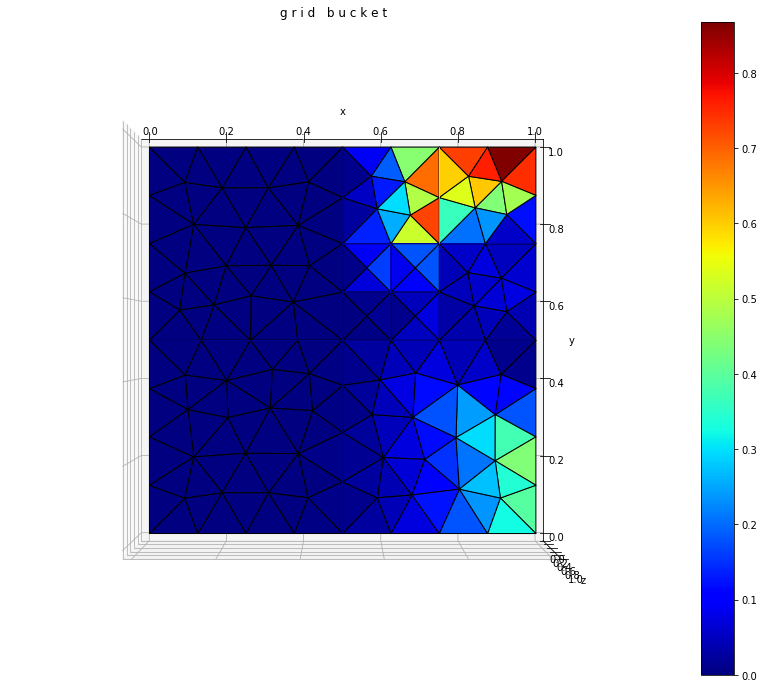

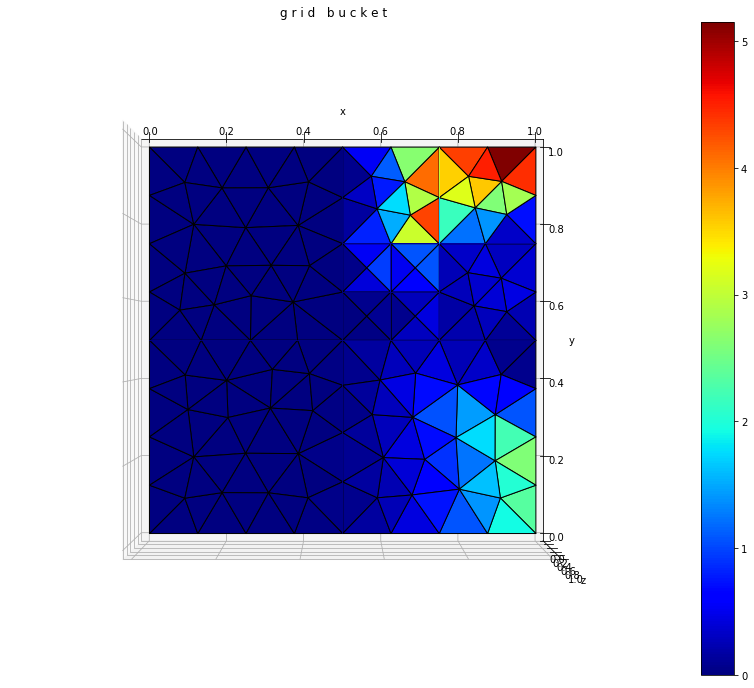

In [14]:
rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(n_steps):
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        rd=reaction.compute_rd(tracer1,rd)
        assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
        exporter1.write_vtu(export_field1, time_step=int(i // save_every))
        
        assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
        exporter2.write_vtu(export_field2, time_step=int(i // save_every))
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #print("tracer1")
    #print(tracer1)
    #print("tracer2")
    #print(tracer2)
    for g,d in gb:
        print("CaSiO3")
        print(d[pp.STATE]["CaSiO3"])
        print("Ca")
        print(d[pp.STATE]["Ca"])
        print("FINE")
    
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport.plot_tracer(CaSiO3)


In [15]:
#for g,d in gb:
    #print("Ca")
    #print(d[pp.STATE]["Ca"])
    #print("CaSiO3")
    #print(d[pp.STATE]["CaSiO3"])
    #print("FINE")